# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## TRATAMIENTO Y LIMPIEZA DE LOS DATOS A ESTUDIAR

## 1. Unión de las preguntas separadas en varias columnas (q10, q39)

In [8]:
# abrimos el .csv con los datos de Data Analyst para las preguntas relevantes seleccionadas
df = pd.read_csv('../resultados/df_da_relevante.csv', index_col = 0)
df = df.reset_index()
df.sample(2)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
369,4322,35-39,Man,India,Bachelor’s degree,5-10 years,SQL,Python,Visual Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,Computers/Technology,"10,000 or more employees",20+,Analyze and understand data to influence produ...,Other,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
1886,21081,18-21,Man,India,Bachelor’s degree,< 1 years,"C, Bash",Java,Spyder,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Altair,Academics/Education,0-49 employees,0,Build and/or run the data infrastructure that...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# sacamos los nulos para monitorearlos a lo largo del proceso
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
index,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
0,0,0,0,0,0,0,143,144,146,1508,1639,2191,2287,2124,2286,2204,2250,2267,2132,2114,2231,2281,2280,2276,1643,2206,193,114,130,150,227,1069,1858,2266,2252,2278,1739,2208,1863,2104,2251,1884,2253,533


In [10]:
# creamos una lista con las respuestas de la q10 unificadas
lista_futura_q10 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q10" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == ",":
                    valor = ''
    if valor == '':
        valor = np.nan
    try:
        lista_futura_q10.append(valor.strip(','))
    except:
        lista_futura_q10.append(valor)
lista_futura_q10[:5]

['Kaggle Notebooks,Colab Notebooks,Databricks Collaborative Notebooks',
 'Google Cloud Datalab',
 'Kaggle Notebooks,Colab Notebooks',
 'Kaggle Notebooks,Azure Notebooks',
 'IBM Watson Studio']

In [11]:
# creamos una lista con las respuestas de la q39 unificadas
lista_futura_q39 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q39" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == ",":
                    valor = ''
    if valor == '':
        valor = np.nan
    try:
        lista_futura_q39.append(valor.strip(','))
    except:
        lista_futura_q39.append(valor)
lista_futura_q39[:5]

[nan,
 nan,
 'I do not share my work publicly',
 nan,
 'I do not share my work publicly']

In [12]:
# creamos las columnas unificadas en el dataframe y borramos las sobrantes
df['q10'] = lista_futura_q10
df['q39'] = lista_futura_q39
df.head(3)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41,q10,q39
0,16,50-54,Man,Belgium,Bachelor’s degree,20+ years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Energy/Mining,"1000-9,999 employees",5-9,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Kaggle Notebooks,Colab Notebooks,Databricks Co...",NaN
1,32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,R,R,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,Ggplot / ggplot2,Manufacturing/Fabrication,250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN
2,33,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,Python,R,"Notepad++,Jupyter Notebook",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Non-profit/Service,0-49 employees,0,Analyze and understand data to influence produ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Basic statistical software (Microsoft Excel, G...","Kaggle Notebooks,Colab Notebooks",I do not share my work publicly


In [13]:
df.drop(columns=spv.columnas_sobrantes, inplace=True)
df.sample()

,index,age,gender,q3,q4,q6,q7,q8,q9,q14,q20,q21,q22,q24,q34,q35,q41,q10,q39
2060,23142,30-34,Man,Ghana,Bachelor’s degree,1-3 years,"Python, R, MATLAB",Python,"RStudio ,PyCharm , Sublime Text","Matplotlib ,Ggplot / ggplot2",Medical/Pharmaceutical,50-249 employees,1-2,Analyze and understand data to influence produ...,Tableau,NaN,"Local development environments (RStudio, Jupyt...",None,GitHub


In [14]:
# reordenamos las columnas
df = df.reindex(columns = ['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14', 'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'])

In [15]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,144,146,151,193,114,130,150,227,1069,1858,1099,533


In [16]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
1802,30-34,Man,South Korea,Bachelor’s degree,< 1 years,Python,Python,"Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...",None,"Matplotlib ,Seaborn",Online Service/Internet-based Services,0-49 employees,0,Analyze and understand data to influence produ...,None,NaN,"GitHub,Kaggle","Local development environments (RStudio, Jupyt..."
1676,25-29,Man,India,Bachelor’s degree,< 1 years,"Python, R, SQL, C, C++, Java, Javascript, Juli...",Python,Jupyter Notebook,None,None,Other,"10,000 or more employees",0,NaN,NaN,NaN,NaN,NaN
278,18-21,Man,India,Bachelor’s degree,1-3 years,"Python, SQL, C, C++, Javascript, MATLAB",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Notebooks,Colab Notebooks,IBM Watson St...","Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Academics/Education,0-49 employees,1-2,Build prototypes to explore applying machine ...,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."


In [17]:
# def limpiar_columna(row):
#     if 'Jupyter (JupyterLab, Jupyter Notebooks, etc) ' in row:
#         r = row.replace(r'Jupyter \(JupyterLab, Jupyter Notebooks, etc\) ', 'Jupyter-JupyterLab-JupyterNotebooks', regex = True)
#         return r
#     else:
#         return row

In [18]:
def limpiar_q9(row):
    try:
        if 'Jupyter (JupyterLab, Jupyter Notebooks, etc)' in row:
            r = row.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", 'Jupyter-JupyterLab-JupyterNotebooks')
            return r
        else:
            return row
    except:
        return row

In [19]:
df['q9'] = df['q9'].apply(limpiar_q9)

In [20]:
df['q9'].reset_index().sample(10)

,index,q9
329,329,"Jupyter-JupyterLab-JupyterNotebooks , Other"
1830,1830,Jupyter Notebook
1683,1683,"RStudio ,Jupyter Notebook"
1262,1262,"Jupyter-JupyterLab-JupyterNotebooks ,RStudio ,..."
494,494,"Jupyter-JupyterLab-JupyterNotebooks ,Visual St..."
982,982,"PyCharm , Notepad++,Jupyter Notebook"
1959,1959,MATLAB
61,61,"RStudio ,Jupyter Notebook"
1347,1347,Jupyter Notebook
2053,2053,"PyCharm ,Jupyter Notebook"


In [21]:
def limpiar_q24(row):
    try:
        if 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data' in row:
            r = row.replace('Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Build and/or run the data infrastructure that my business uses for storing analyzing and operationalizing data')
            return r
        else:
            return row
    except:
        return row

In [22]:
df['q24'] = df['q24'].apply(limpiar_q24)
df['q24'].reset_index().sample(10)

,index,q24
803,803,Analyze and understand data to influence produ...
1995,1995,None of these activities are an important par...
600,600,Analyze and understand data to influence produ...
39,39,None of these activities are an important par...
979,979,Analyze and understand data to influence produ...
606,606,Analyze and understand data to influence produ...
26,26,Analyze and understand data to influence produ...
430,430,NaN
1127,1127,Analyze and understand data to influence produ...
102,102,Analyze and understand data to influence produ...


In [23]:
# def limpiar_q41(row):
#     try:
#         if "Basic statistical software (Microsoft Excel', ' Google Sheets', ' etc.)" in row:
#             r = row.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", "Basic statistical software (Microsoft Excel-Google Sheets-etc.)")
#             return r
#         elif "Local development environments (RStudio', ' JupyterLab', ' etc.)" in row:
#             r = row.replace("Local development environments (RStudio', ' JupyterLab', ' etc.)", "Local development environments (RStudio-JupyterLab-etc)")
#             return r
#         elif "Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)" in row:
#             r = row.replace("Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)", "Business intelligence software (Salesforce-Tableau-Spotfire.etc.)")
#             return r
#         elif "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" in row:
#             r = row.replace("Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure-etc.)")
#             return r
#             return r
#         elif "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" in row:
#             r = row.replace("Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure-etc.)")
#             return r
#         else:
#             return row
#     except:
#         return row

In [24]:
for i in range(100):  
    print(df['q41'][i])

Local development environments (RStudio, JupyterLab, etc.)
nan
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
Local development environments (RStudio, JupyterLab, etc.)
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
nan
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)
Local development environments (RStudio, JupyterLab, etc.)
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
Local development environments (RStudio, JupyterLab, etc.)
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
Advanced statistical software (SPSS, SAS, etc.)
nan
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
nan
nan
Basic statistical software (Microsoft Excel, Google Sheets, etc.)
Basic statistical software (Microsoft Exce

In [25]:
def limpiar_q41a(row):
    try:
        if "Basic statistical software (Microsoft Excel, Google Sheets, etc.)" in row:
            r = row.replace("Basic statistical software (Microsoft Excel, Google Sheets, etc.)", "Basic statistical software (Microsoft Excel-Google Sheets)")
            return r
        else:
            return row
    except:
        return row

In [26]:
df['q41'] = df['q41'].apply(limpiar_q41a)

In [27]:
def limpiar_q41b(row):
    try:
        if "Local development environments (RStudio, JupyterLab, etc.)" in row:
            r = row.replace("Local development environments (RStudio, JupyterLab, etc.)", "Local development environments (RStudio-JupyterLab)")
            return r
        else:
            return row
    except:
        return row

In [28]:
df['q41'] = df['q41'].apply(limpiar_q41b)

In [29]:
def limpiar_q41c(row):
    try:
        if "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)" in row:
            r = row.replace("Business intelligence software (Salesforce, Tableau, Spotfire, etc.)", "Business intelligence software (Salesforce-Tableau-Spotfire)")
            return r
        else:
            return row
    except:
        return row

In [30]:
df['q41'] = df['q41'].apply(limpiar_q41c)

In [31]:
def limpiar_q41d(row):
    try:
        if "Advanced statistical software (SPSS, SAS, etc.)" in row:
            r = row.replace("Advanced statistical software (SPSS, SAS, etc.)", "Advanced statistical software (SPSS-SAS)")
            return r
        else:
            return row
    except:
        return row

In [32]:
df['q41'] = df['q41'].apply(limpiar_q41d)

In [33]:
def limpiar_q41e(row):
    try:
        if "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)" in row:
            r = row.replace("Cloud-based data software & APIs (AWS, GCP, Azure, etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure)")
            return r
        else:
            return row
    except:
        return row

In [34]:
df['q41'] = df['q41'].apply(limpiar_q41e)

In [35]:
# "Basic statistical software (Microsoft Excel', ' Google Sheets', ' etc.)" : 'Basic statistical software (Microsoft Excel-Google Sheets-etc.)',
# "Local development environments (RStudio', ' JupyterLab', ' etc.)" : 'Local development environments (RStudio-JupyterLab-etc)',
# "Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)" : 'Business intelligence software (Salesforce-Tableau-Spotfire.etc.)',
# "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" : 'Cloud-based data software & APIs (AWS-GCP-Azure-etc.)',
# "Advanced statistical software (SPSS', ' SAS', ' etc.)" : 'Advanced statistical software (SPSS-SAS-etc.)'

In [36]:
# df['q9_'] = df['q9'].str.replace(r'Jupyter \(JupyterLab, Jupyter Notebooks, etc\) ', 'Jupyter (JupyterLab-Jupyter Notebooks-etc),Jupyter Notebook', regex=True)

In [37]:
df.columns

Index(['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14',
       'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'],
      dtype='object')

In [38]:
# for col in df.columns:
#     df[col] = df[col].replace(spv.dict_changes, regex=True)

In [39]:
df.sample(5)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
1996,35-39,Woman,India,Bachelor’s degree,3-5 years,"Python, SQL, Javascript, Other",Python,Jupyter Notebook,None,"Matplotlib ,Seaborn ,Ggplot / ggplot2",Other,50-249 employees,0,None of these activities are an important par...,NaN,NaN,NaN,Basic statistical software (Microsoft Excel-Go...
16,25-29,Woman,India,Bachelor’s degree,< 1 years,"Python, R, SQL",R,"Jupyter-JupyterLab-JupyterNotebooks ,RStudio ,...",Google Cloud Datalab,"Matplotlib ,Ggplot / ggplot2",Energy/Mining,"10,000 or more employees",20+,Analyze and understand data to influence produ...,"Microsoft Power BI, Tableau, Alteryx",Microsoft Power BI,I do not share my work publicly,Basic statistical software (Microsoft Excel-Go...
115,40-44,Man,Ukraine,Master’s degree,3-5 years,"Python, Javascript",Python,Other,Google Cloud Datalab,Matplotlib,Other,0-49 employees,1-2,NaN,NaN,NaN,NaN,NaN
629,18-21,Man,India,Master’s degree,3-5 years,"Python, R, C++",C++,Visual Studio Code (VSCode),None,None,Academics/Education,0-49 employees,0,NaN,NaN,NaN,NaN,NaN
1597,30-34,Man,Canada,Master’s degree,5-10 years,"Python, R, SQL",Python,Jupyter Notebook,Google Cloud Notebooks (AI Platform / Vertex AI),"Matplotlib ,Seaborn ,Ggplot / ggplot2",Academics/Education,250-999 employees,3-4,Analyze and understand data to influence produ...,NaN,NaN,NaN,Local development environments (RStudio-Jupyte...


In [40]:
# dict_keys = list(spv.dict_changes.keys())

In [41]:
# def limpiar_columna(row):
#     if row in dict_keys:
#         r = row.replace(spv.dict_changes, regex = True)
#         return r
#     else:
#         return row

In [42]:
# hue_cols = []
# for col in df.columns:
#     if col not in spv.columnas_unidas:
#         hue_cols.append(col)
#     else:
#         pass

In [43]:
# for col in spv.columnas_unidas:
#     df[col] = df[col].apply(limpiar_columna)

In [44]:
df.sample(2)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
551,22-24,Woman,Iraq,Bachelor’s degree,1-3 years,"Python, SQL, Java, Other",Python,"Jupyter-JupyterLab-JupyterNotebooks ,Visual St...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,22-24,Man,Pakistan,Bachelor’s degree,1-3 years,"SQL, Javascript",SQL,"RStudio ,Visual Studio ,Visual Studio Code (VS...",Google Cloud Datalab,Other,Accounting/Finance,0-49 employees,1-2,NaN,NaN,NaN,NaN,NaN


In [45]:
for col in spv.columnas_unidas:
    df[col] = df[col].str.split(',')

In [46]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,144,146,151,193,114,130,150,227,1069,1858,1099,533


In [49]:
# crea un diccionario que asocie cada país con su continente correspondiente
continentes = {'Belgium': 'Europa', 'Ukraine': 'Europa', 'Italy': 'Europa', 'Spain': 'Europa', 'United Kingdom of Great Britain and Northern Ireland': 'Europa', 
               'Germany': 'Europa', 'France': 'Europa', 'Greece': 'Europa', 'Portugal': 'Europa', 'Netherlands': 'Europa', 
               'Poland': 'Europa', 'Switzerland': 'Europa', 'Romania': 'Europa', 'Czech Republic': 'Europa', 'Sweden': 'Europa', 
               'Ireland': 'Europa', 'Denmark': 'Europa', 'Belarus': 'Europa', 'Austria': 'Europa', 'Norway': 'Europa', 
               'China': 'Asia', 'India': 'Asia', 'Israel': 'Asia', 'Pakistan': 'Asia', 'Indonesia': 'Asia', 'Sri Lanka': 'Asia', 
               'Iran, Islamic Republic of...': 'Asia', 'South Korea': 'Asia', 'Russia': 'Asia', 'Taiwan': 'Asia', 
               'Philippines': 'Asia', 'Singapore': 'Asia', 'Japan': 'Asia', 'Saudi Arabia': 'Asia', 'Thailand': 'Asia', 
               'Hong Kong (S.A.R.)': 'Asia', 'Bangladesh': 'Asia', 'Malaysia': 'Asia', 'Viet Nam': 'Asia', 
               'United Arab Emirates': 'Asia', 'Iraq': 'Asia', 'Nepal': 'Asia', 'Kazakhstan': 'Asia', 
               'United States of America': 'América del Norte', 'Canada': 'América del Norte', 
               'Colombia': 'América del Sur', 'Brazil': 'América del Sur', 'Peru': 'América del Sur', 'Mexico': 'América del Sur', 
               'Argentina': 'América del Sur', 'Ecuador': 'América del Sur', 'Chile': 'América del Sur', 
               'Egypt': 'África', 'South Africa': 'África', 'Nigeria': 'África', 'Tunisia': 'África', 'Turkey': 'África', 
               'Kenya': 'África', 'Ghana': 'África', 'Morocco': 'África', 'Ethiopia': 'África', 'Uganda': 'África', 
               'Australia': 'Oceanía', 'I do not wish to disclose my location': 'Otros'}



In [51]:
# crea una nueva columna con los continentes correspondientes a cada país
df['continente'] = df['q3'].map(continentes)

In [53]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
1315,45-49,Man,Australia,Master’s degree,1-3 years,"[Python, Bash]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Notepa...",[None],[ Other],[Government/Public Service],0-49 employees,10-14,[Analyze and understand data to influence prod...,Other,NaN,[I do not share my work publicly],[Other],Oceanía
1091,25-29,Man,Greece,Master’s degree,1-3 years,"[Python, SQL]",Python,[ Spyder],[None],"[ Matplotlib , Ggplot / ggplot2 ]",[Broadcasting/Communications],"10,000 or more employees",20+,[Analyze and understand data to influence prod...,Microsoft Power BI,NaN,[I do not share my work publicly],[Basic statistical software (Microsoft Excel-G...,Europa
1327,25-29,Man,United States of America,Bachelor’s degree,1-3 years,"[ R, SQL]",SQL,"[RStudio , Visual Studio Code (VSCode) ]",[None],[Ggplot / ggplot2 ],[Insurance/Risk Assessment],"10,000 or more employees",20+,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,América del Norte


In [54]:
# # utiliza pd.cut para dividir los datos en base a la columna de continentes
# df['continente_categoría'] = pd.cut(df['continente'], 
#                                      bins=['Europa', 'Asia', 'América del Norte', 'América del Sur', 'África', 'Oceanía', 'Otros'], 
#                                      labels=['Europa', 'Asia', 'América del Norte', 'América del Sur', 'África', 'Oceanía', 'Otros'])

# # elimina la columna de continentes si ya no la necesitas
# #df.drop('continente', axis=1, inplace

In [55]:
df.to_csv('../resultados/df_da_relevante_limpio.csv')

In [56]:
df.head()

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
0,50-54,Man,Belgium,Bachelor’s degree,20+ years,"[Python, SQL]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Jupyter...","[Kaggle Notebooks, Colab Notebooks, Databricks...","[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Energy/Mining],"1000-9,999 employees",5-9,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,Europa
1,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,[ R],R,[RStudio ],[Google Cloud Datalab],[Ggplot / ggplot2 ],[Manufacturing/Fabrication],250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,América del Norte
2,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,[Python],R,"[ Notepad++, Jupyter Notebook]","[Kaggle Notebooks, Colab Notebooks]",[ None],[Non-profit/Service],0-49 employees,0,[Analyze and understand data to influence prod...,None,NaN,[I do not share my work publicly],[Basic statistical software (Microsoft Excel-G...,África
3,22-24,Man,China,Some college/university study without earning ...,< 1 years,"[Python, SQL, C, C++, Java, Javascript, ...",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Visual ...","[Kaggle Notebooks, Azure Notebooks]","[ Matplotlib , Plotly / Plotly Express ]",[Computers/Technology],0-49 employees,0,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,Asia
4,40-44,Man,South Africa,Master’s degree,1-3 years,"[ R, SQL]",R,"[RStudio , Jupyter Notebook]",[IBM Watson Studio],"[Plotly / Plotly Express , Ggplot / ggplot2 , ...",[Manufacturing/Fabrication],250-999 employees,1-2,[Analyze and understand data to influence prod...,Microsoft Power BI,NaN,[I do not share my work publicly],[Local development environments (RStudio-Jupyt...,África


In [59]:
df_q7 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q21', 'q22', 'q34', 'q35']]
df_q9 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q9', 'q21', 'q22', 'q34', 'q35']]
df_q10 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q10', 'q21', 'q22', 'q34', 'q35']]
df_q14 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q14', 'q21', 'q22', 'q34', 'q35']]
df_q20 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q20', 'q21', 'q22', 'q34', 'q35']]
df_q24 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q24', 'q34', 'q35']]
df_q39 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q39']]
df_q41 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q41']]

In [60]:
df_q7 = df.explode('q7')
df_q9 = df.explode('q9')
df_q10 = df.explode('q10')
df_q14 = df.explode('q14')
df_q20 = df.explode('q20')
df_q24 = df.explode('q24')
df_q39 = df.explode('q39')
df_q41 = df.explode('q41')

In [61]:
df_q7.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
1860,45-49,Man,United States of America,Master’s degree,20+ years,Python,Python,[Jupyter Notebook],[Kaggle Notebooks],"[Seaborn , D3 js ]",[Marketing/CRM],0-49 employees,1-2,[Analyze and understand data to influence prod...,"Amazon QuickSight, Tableau",Tableau,[GitHub],[Business intelligence software (Salesforce-Ta...,América del Norte
1663,22-24,Man,India,Master’s degree,3-5 years,SQL,C++,"[Visual Studio Code (VSCode) , PyCharm , Jupyt...","[Kaggle Notebooks, Colab Notebooks]",[ Matplotlib ],[Computers/Technology],"10,000 or more employees",0,[ None of these activities are an important pa...,NaN,NaN,NaN,[Business intelligence software (Salesforce-Ta...,Asia
402,35-39,Woman,India,Master’s degree,3-5 years,Python,Python,[Jupyter Notebook],[Kaggle Notebooks],"[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Computers/Technology],250-999 employees,20+,[Analyze and understand data to influence prod...,NaN,NaN,NaN,NaN,Asia


In [62]:
df_q7['q7']

0            Python
0               SQL
1                 R
2            Python
3            Python
           ...     
2299              C
2300         Python
2300            SQL
2300     Javascript
2300           Bash
Name: q7, Length: 5430, dtype: object

In [63]:
mask = df_q7['q3'].isin(spv.lista_europa)
df_europa = df_q7[mask]


<Axes: xlabel='count', ylabel='q7'>

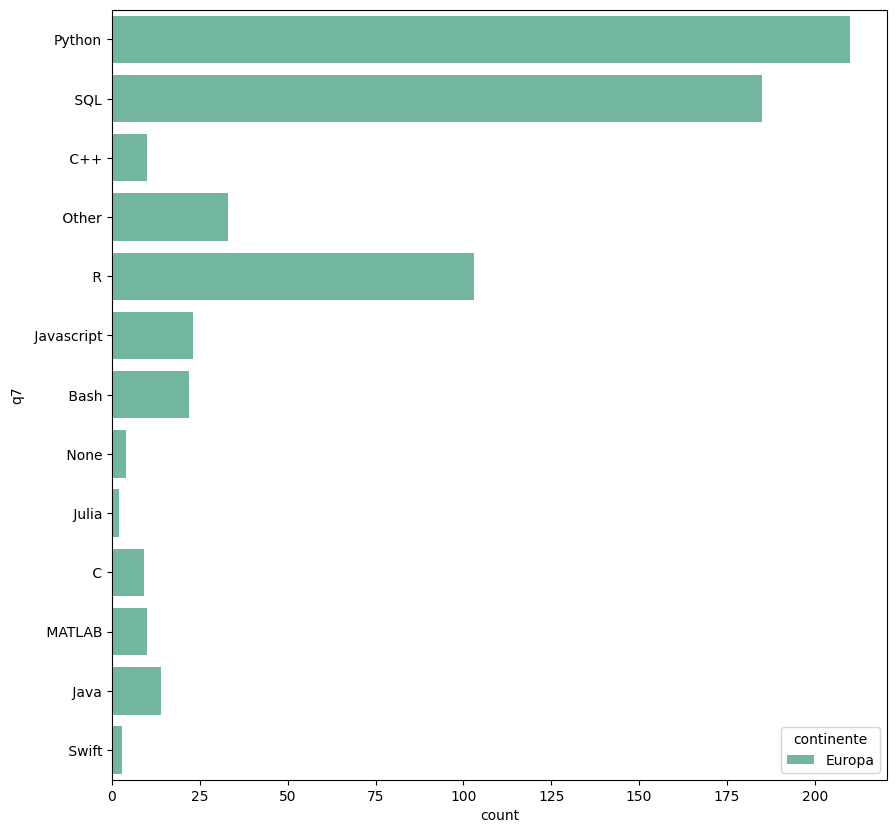

In [73]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', hue = 'continente', data = df_europa, palette = 'Set2')

<Axes: xlabel='count', ylabel='q7'>

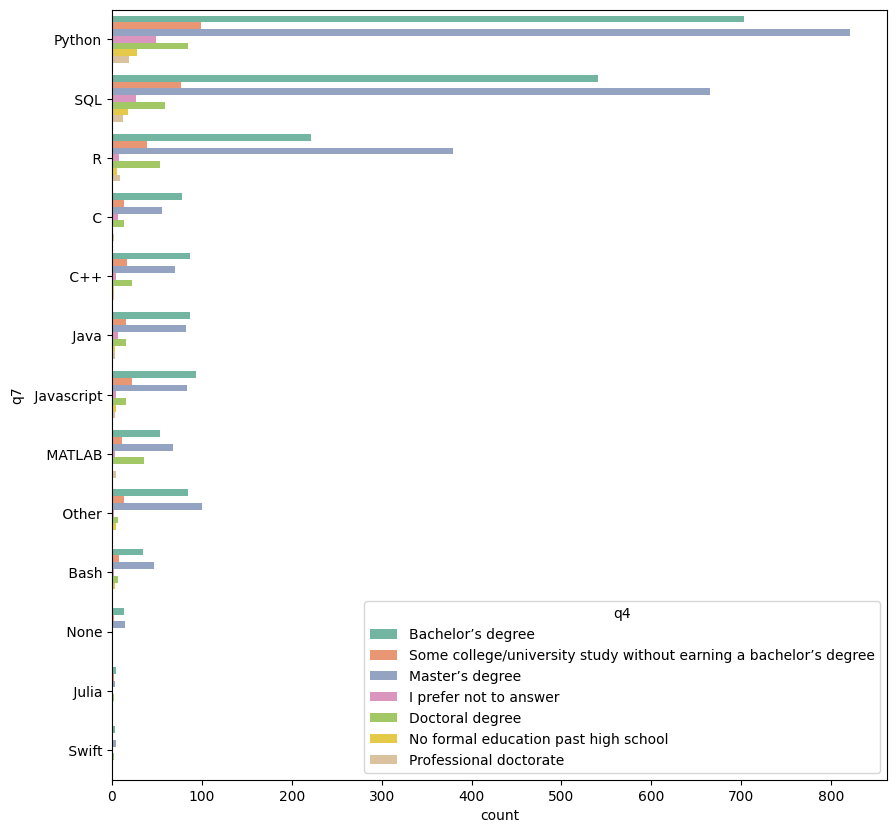

In [65]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', data = df_q7,hue = 'q4', palette = 'Set2')

<Axes: xlabel='count', ylabel='q9'>

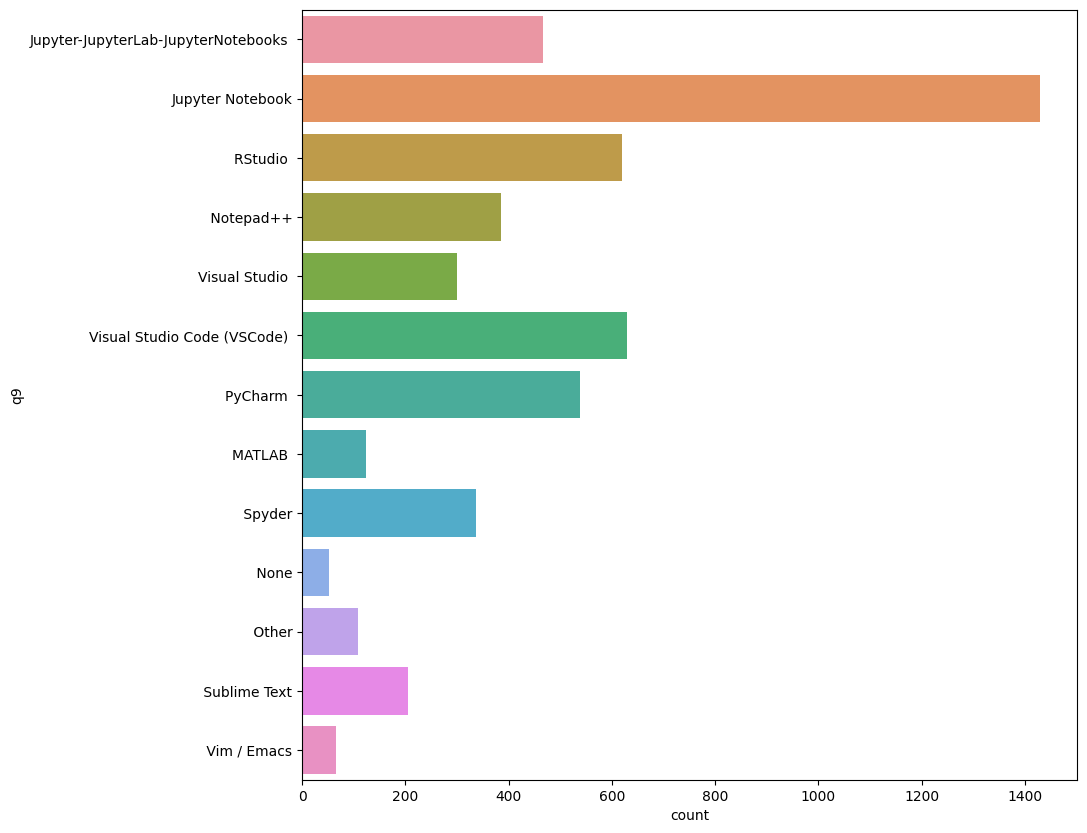

In [66]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q9', data = df_q9)

<Axes: xlabel='count', ylabel='q24'>

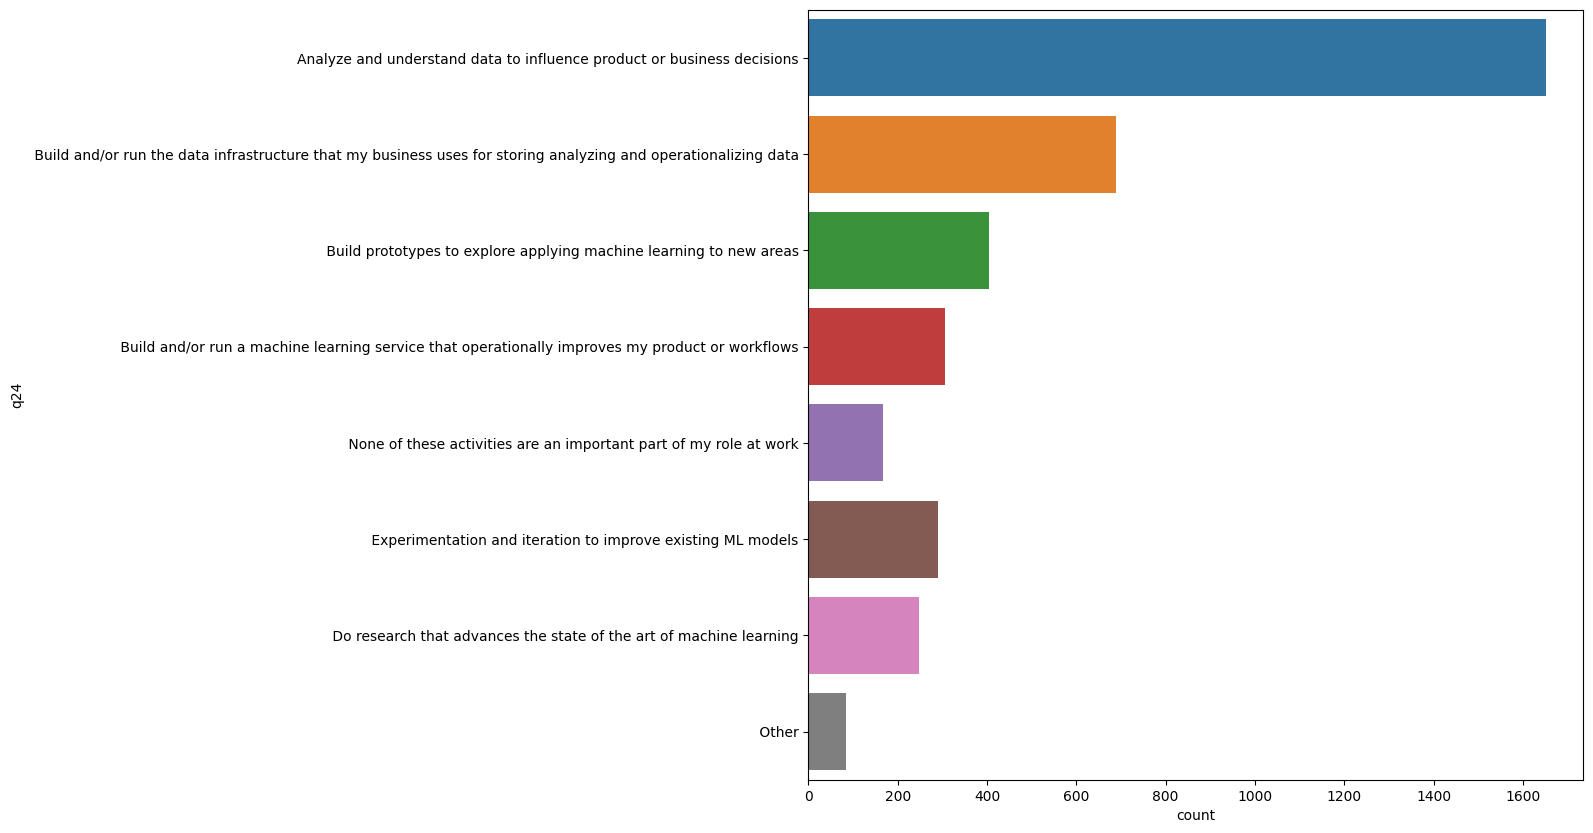

In [67]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q24', data = df_q24)

<Axes: xlabel='count', ylabel='q39'>

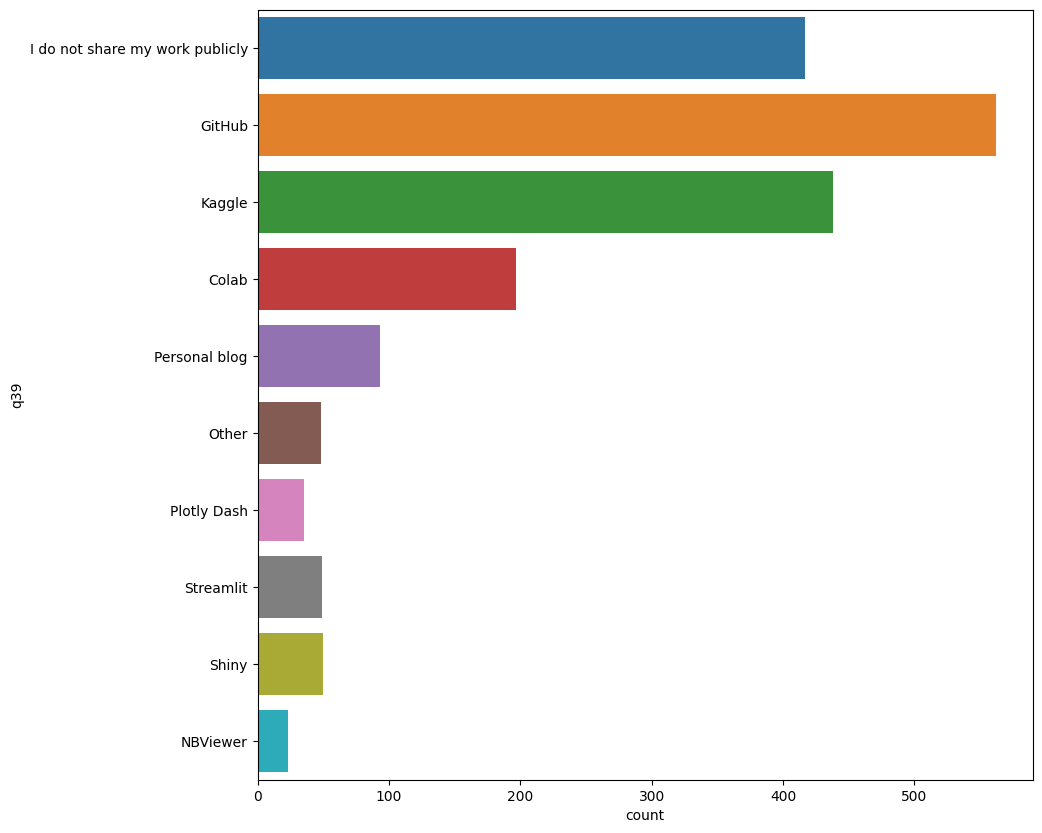

In [68]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q39', data = df_q39)

<Axes: xlabel='count', ylabel='q41'>

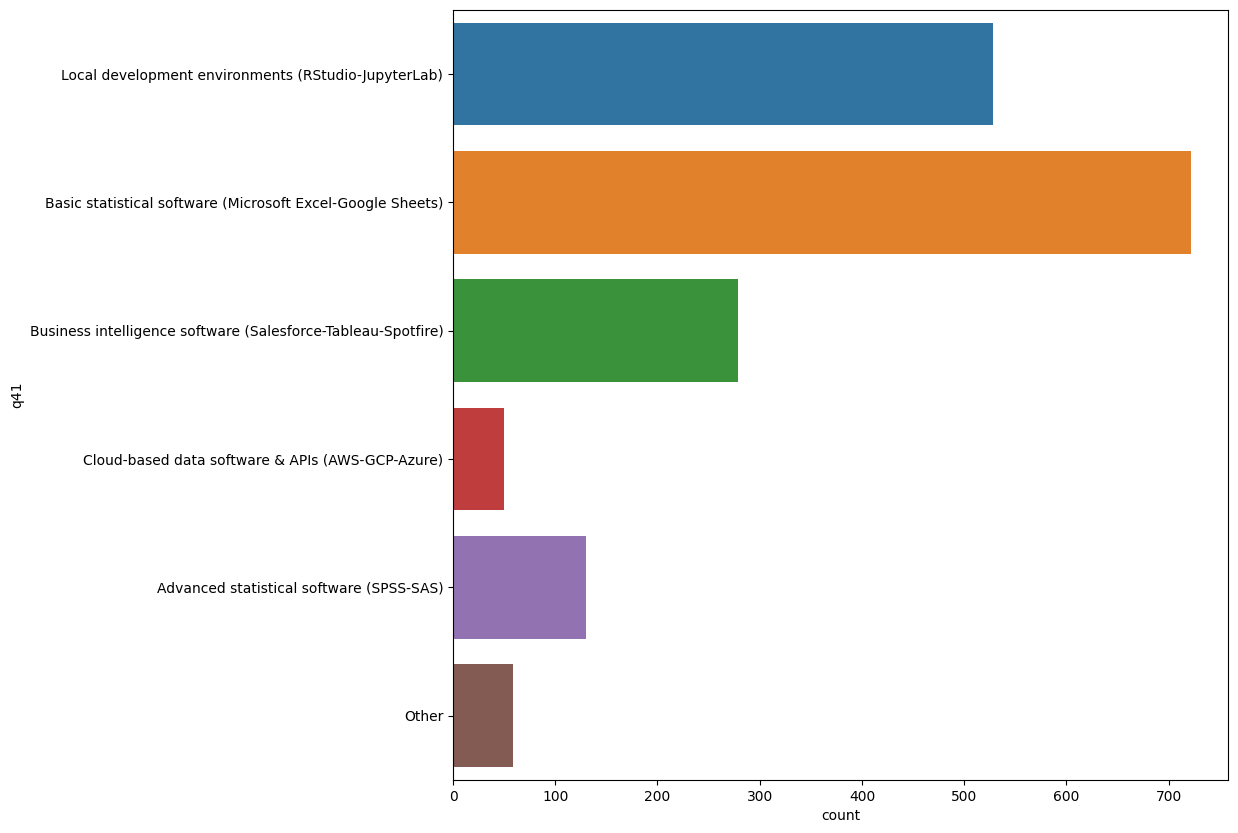

In [69]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q41', data = df_q41)

<Axes: xlabel='count', ylabel='q9'>

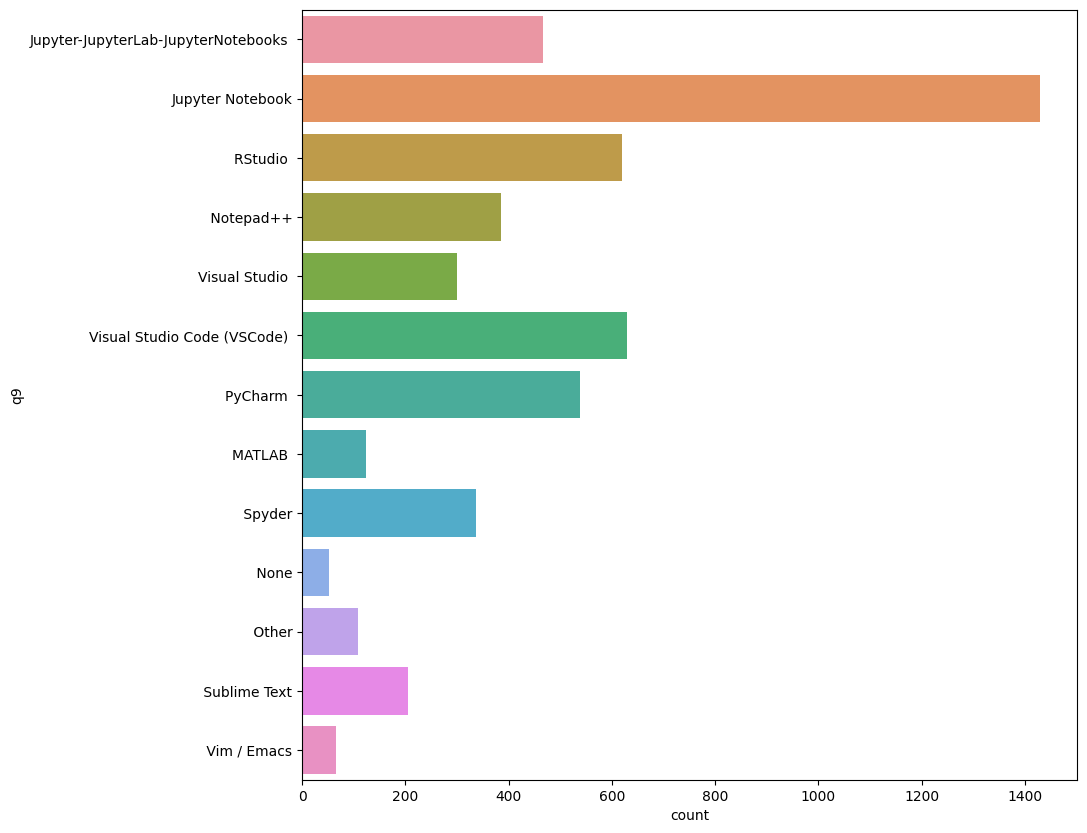

In [70]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q9', data = df_q9)

<Axes: xlabel='count', ylabel='q14'>

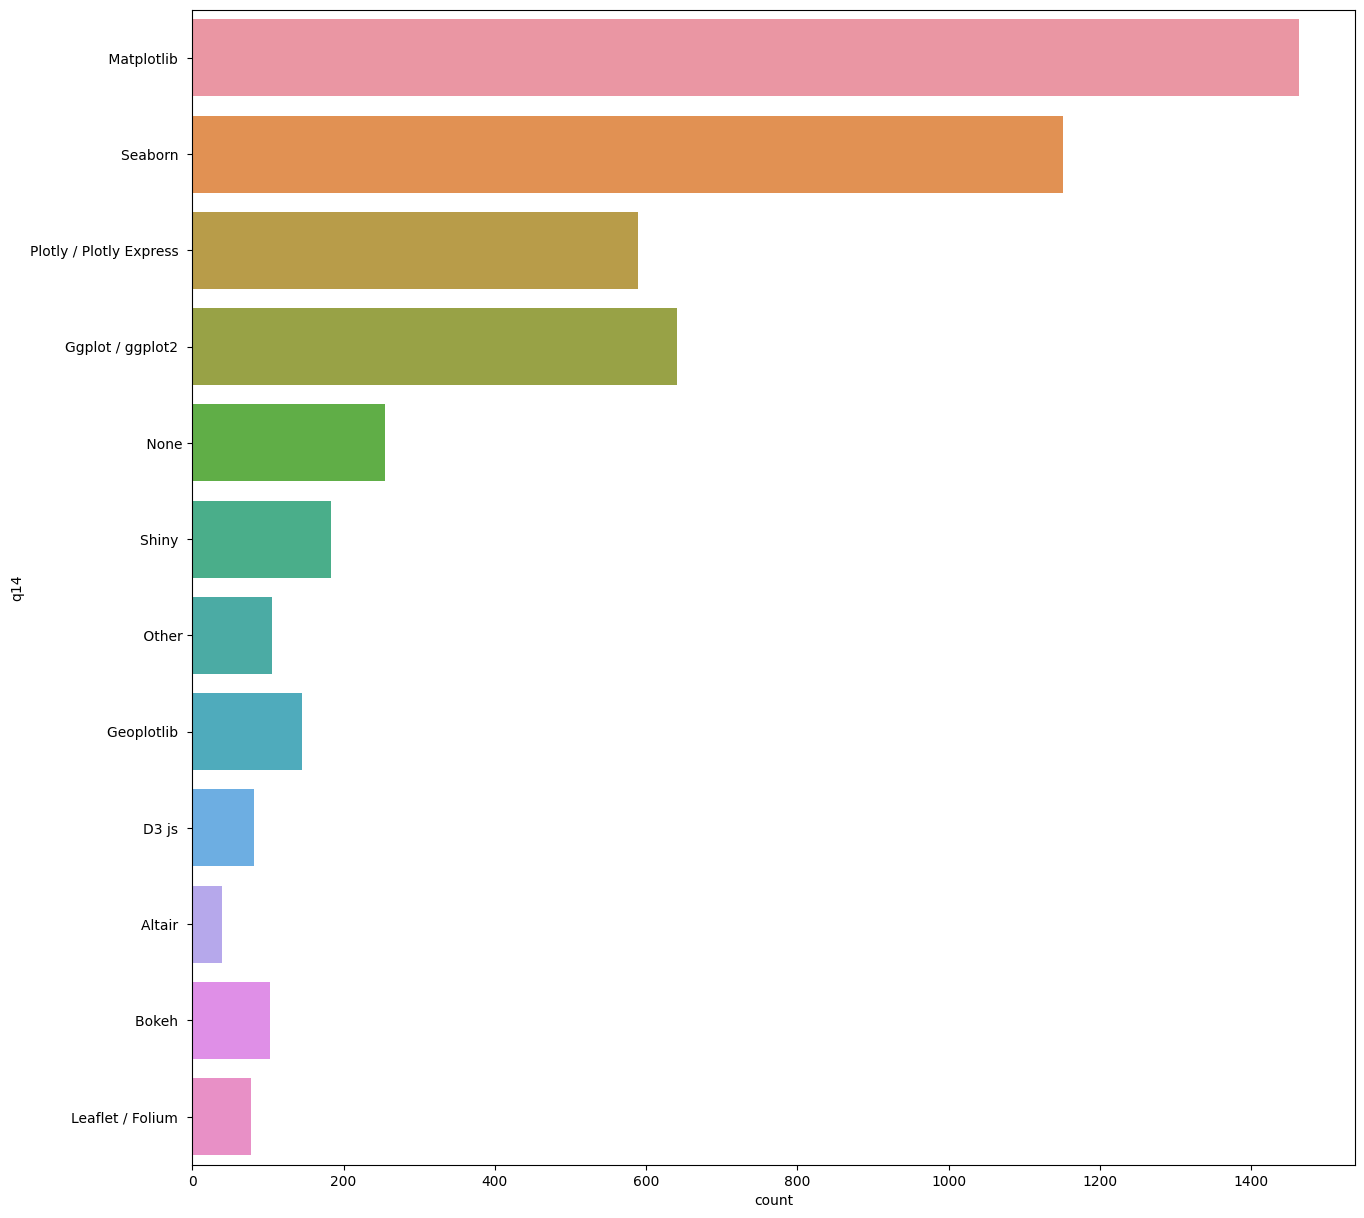

In [71]:
plt.figure(figsize = (15,15))
sns.countplot(y = 'q14', data = df_q14)

In [72]:
df_explode.head()

NameError: name 'df_explode' is not defined

In [ ]:
df_explode.sample(5)

In [ ]:
# df["q7"] = df["q7"].str.split(',')

In [ ]:
df.sample(3)

In [ ]:
# df["q7"].drop_duplicates(inplace=True)
# df["q7"] = df["q7"].explode()

In [ ]:
# for q in lista_qs_exp:
#     df[q] = df[q].str.split(',')
#     df[q] = df[q].explode(q)


In [ ]:
# Dividimos las respuestas de la pregunta q7 por la ','
# for con in 
# df["q7"] = df["q7"].str.split(",")
# df_q7 = df_ana2.explode("q7")
# sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
df.isnull().sum()/df.shape[0]

In [ ]:
# #probamos rename
# def renombrar_columnas(dataframe,inicio,final,num_q):
#     nom_col = {}
#     for col in dataframe.columns[inicio : final+1]:
#         try: 
#             for i in dataframe[col].unique():
#                 i = str(i) 
#                 if i != 'nan':
#                     i = i.strip().replace(' ', '_')
#                     nom_col[col] = f'q{num_q}_{i}'
#                 else:
#                     pass
#         except:
#             print('estoy en el except con la columna {col} , elemento {i}')
            
#     renombrado = dataframe.rename(columns = nom_col)
    
#     return renombrado

In [ ]:
df = renombrar_columnas(df, 8, 24, 10)


In [ ]:
df.sample(3)

In [ ]:
df = renombrar_columnas(df, 28, 37, 39)

In [ ]:
df.columns

In [ ]:
df_ana = df.copy()
df_ana.head(2)

In [ ]:
df_ana.columns

In [ ]:
df_ana2 = df_ana[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9']]
df_ana2.head(2)

In [ ]:
df_ana2["q7"] = df_ana2["q7"].str.split(",")

In [ ]:
df_ana2.head(2)

In [ ]:
df_q7 = df_ana2.explode("q7")
df_q7.head()

In [ ]:
sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
#funcion para cambiar los nans
def yes_no(dataframe, inicio, final):
    for col in dataframe.columns[inicio:(final+1)]:
        dataframe[col] = dataframe[col].apply(lambda data: np.where(type(data) != float, 'yes', 'no'))
    return dataframe

In [ ]:
df = yes_no(df, 8, 24)

In [ ]:
df = yes_no(df, 28, 37)

In [ ]:
df.sample(3)

In [ ]:
df.isnull().sum().reset_index().T

In [ ]:
q7_responses = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

In [ ]:
# def sacar_herramienta(col):
    
#     try:
#         if re.findall(patron, col):
#             return 'yes'
#         else:
#             return 'no'
#     except:
#         return 'unknown'


In [ ]:
def sacar_herramienta(col):
    
    try:
        if re.findall(patron, col):
            return 1
        else:
            return 0
    except:
        return np.nan

In [ ]:
for patron in q7_responses:
    df[f'q7_{patron}'] = df['q7'].apply(sacar_herramienta)

df.drop(columns = 'q7', inplace = True)

In [ ]:
df.head(2)

In [ ]:
q9_responses = ['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code (VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim, Emacs or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

In [ ]:
for patron in q9_responses:
    df[f'q9_{patron}'] = df['q9'].apply(sacar_herramienta)
df.drop(columns = 'q9', inplace = True)

In [ ]:
q14_responses = ['Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']
for patron in q14_responses:
    df[f'q14_{patron}'] = df['q14'].apply(sacar_herramienta)

df.drop(columns = 'q14', inplace = True)

In [ ]:
q41_responses = ['Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 
                 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 
                 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Other']
for patron in q14_responses:
    df[f'q41_{patron}'] = df['q41'].apply(sacar_herramienta)

df.drop(columns = 'q41', inplace = True)

In [ ]:
df.sample(3)

In [ ]:
orden = ['age', 'gender', 'q3', 'q4', 'q6', 'q7_Python', 'q7_R', 'q7_SQL', 'q7_C', 'q7_C++', 'q7_Java', 'q7_Javascript', 'q7_Julia','q7_Swift', 'q7_Bash', 'q7_MATLAB', 
         'q7_None', 'q7_Other','q8', 'q9_JupyterLab', 'q9_RStudio', 'q9_Visual Studio','q9_Visual Studio Code (VSCode)', 'q9_PyCharm', 'q9_Spyder','q9_Notepad++', 
         'q9_Sublime Text', 'q9_Vim, Emacs or similar', 'q9_MATLAB', 'q9_Jupyter Notebook', 'q9_None', 'q9_Other','q10_Kaggle_Notebooks','q10_Colab_Notebooks', 'q10_Azure_Notebooks',
         'q10_Paperspace_/_Gradient', 'q10_Binder_/_JupyterHub', 'q10_Code_Ocean', 'q10_IBM_Watson_Studio', 'q10_Amazon_Sagemaker_Studio_Notebooks', 'q10_Amazon_EMR_Notebooks',
         'q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)', 'q10_Google_Cloud_Datalab', 'q10_Databricks_Collaborative_Notebooks', 'q10_Zeppelin_/_Zepl_Notebooks', 'q10_Deepnote_Notebooks',
         'q10_Observable_Notebooks', 'q10_None', 'q10_Other', 'q14_Seaborn', 'q14_Plotly / Plotly Express', 'q14_Ggplot / ggplot2', 'q14_Shiny', 'q14_D3 js', 'q14_Altair', 'q14_Bokeh', 
         'q14_Geoplotlib','q14_Leaflet / Folium', 'q14_None', 'q14_Other','q34', 'q35', 'q39_Plotly_Dash', 'q39_Streamlit', 'q39_NBViewer', 'q39_GitHub', 'q39_Personal_blog', 'q39_Kaggle', 
         'q39_Colab', 'q39_Shiny', 'q39_I_do_not_share_my_work_publicly', 'q39_Other', 'q41_Seaborn', 'q41_Plotly / Plotly Express', 'q41_Ggplot / ggplot2', 'q41_Shiny', 'q41_D3 js', 
         'q41_Altair', 'q41_Bokeh', 'q41_Geoplotlib', 'q41_Leaflet / Folium', 'q41_None', 'q41_Other']

In [ ]:
df = df.reindex(columns = orden)

In [ ]:
df.sample()

In [ ]:
df_q7 = df[df.columns[5:18]]

In [ ]:
q7_count = df_q7.sum().reset_index()

In [ ]:
q7_count.columns = ['herramienta', 'conteo']

In [ ]:
q7_count

In [ ]:
sns.barplot(y = 'herramienta', x= 'conteo', data = q7_count)

In [ ]:
sns.barplot(y = 'herramienta', x = ,hue = 'gender', data = df)

In [ ]:
for col in df.columns[5:18]:
    print(f'{col}')
    display(df[col].value_counts().reset_index())